In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/kaggle/input/swiggy-restaurants-dataset/swiggy.csv')
df.head()

,id,name,city,rating,rating_count,cost,cuisine,lic_no,link,address,menu
0,567335,AB FOODS POINT,Abohar,--,Too Few Ratings,₹ 200,"Beverages,Pizzas",22122652000138,https://www.swiggy.com/restaurants/ab-foods-po...,"AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI...",Menu/567335.json
1,531342,Janta Sweet House,Abohar,4.4,50+ ratings,₹ 200,"Sweets,Bakery",12117201000112,https://www.swiggy.com/restaurants/janta-sweet...,"Janta Sweet House, Bazar No.9, Circullar Road,...",Menu/531342.json
2,158203,theka coffee desi,Abohar,3.8,100+ ratings,₹ 100,Beverages,22121652000190,https://www.swiggy.com/restaurants/theka-coffe...,"theka coffee desi, sahtiya sadan road city",Menu/158203.json
3,187912,Singh Hut,Abohar,3.7,20+ ratings,₹ 250,"Fast Food,Indian",22119652000167,https://www.swiggy.com/restaurants/singh-hut-n...,"Singh Hut, CIRCULAR ROAD NEAR NEHRU PARK ABOHAR",Menu/187912.json
4,543530,GRILL MASTERS,Abohar,--,Too Few Ratings,₹ 250,"Italian-American,Fast Food",12122201000053,https://www.swiggy.com/restaurants/grill-maste...,"GRILL MASTERS, ADA Heights, Abohar - Hanumanga...",Menu/543530.json


## Restaurant with Maximum Rating in Abohar

In [3]:
pf=pd.DataFrame(df)
pf.loc[pf['city']=='Abohar'].sort_values(by ='rating', ascending=False).head()

,id,name,city,rating,rating_count,cost,cuisine,lic_no,link,address,menu
19,530909,FOODY MOOD,Abohar,4.7,20+ ratings,₹ 300,"Fast Food,Chinese",22122652000115,https://www.swiggy.com/restaurants/foody-mood-...,"FOODY MOOD, Arya nagar St no 7 Abohar, Abohar ...",Menu/530909.json
1,531342,Janta Sweet House,Abohar,4.4,50+ ratings,₹ 200,"Sweets,Bakery",12117201000112,https://www.swiggy.com/restaurants/janta-sweet...,"Janta Sweet House, Bazar No.9, Circullar Road,...",Menu/531342.json
14,156587,Bharawan Da Dhaba,Abohar,4.4,50+ ratings,₹ 300,Indian,license,https://www.swiggy.com/restaurants/bharawan-da...,"Bharawan Da Dhaba, rimpy bakery 12 circular ro...",Menu/156587.json
29,171675,Domino's Pizza,Abohar,4.4,20+ ratings,₹ 400,Pizzas,12115201000054,https://www.swiggy.com/restaurants/dominos-piz...,"Domino's Pizza, ADAHeights,HanumangarhRoad,Sun...",Menu/171675.json
8,156602,Hinglaj Kachori Bhandhar,Abohar,4.2,20+ ratings,₹ 100,"Snacks,Chaat",22119652000042,https://www.swiggy.com/restaurants/hinglaj-kac...,"Hinglaj Kachori Bhandhar, street no 11 circula...",Menu/156602.json


## Number of cities (including subregions) where swiggy is having their restaurants listed?

In [4]:
pf.groupby(['city']).nunique()

,id,name,rating,rating_count,cost,cuisine,lic_no,link,address,menu
city,,,,,,,,,,
"Abids & Koti,Hyderabad",104,104,14,7,15,65,86,104,104,104
Abohar,62,62,9,4,10,41,49,62,62,62
"Adajan,Surat",427,426,21,6,26,155,359,427,426,427
Adilabad,25,25,8,4,7,15,19,25,25,25
Adityapur,356,356,23,6,25,120,286,356,356,356
...,...,...,...,...,...,...,...,...,...,...
Yavatmal,66,66,14,4,8,40,59,66,66,66
"Yelahanka,Bangalore",507,506,28,6,40,197,400,507,507,507
"Yeshwanthpur,Bangalore",235,235,20,6,28,116,195,235,235,235


## The city with the maximum number of restaurants listed on Swiggy?

In [5]:
city_counts = pf.groupby('city')['name'].nunique()
city_counts.sort_values(ascending=False).head()

city
Bikaner              1664
Noida-1              1421
Indirapuram,Delhi    1278
BTM,Bangalore        1161
Rohini,Delhi         1131
Name: name, dtype: int64

In [6]:
city_counts = pf.groupby('city')['name'].nunique()
city_counts.sort_values(ascending=False).head(1)

city
Bikaner    1664
Name: name, dtype: int64

##  Restaurant chain with maximum number of branches?

In [7]:
resturant_chain=pf.groupby('name').nunique()
resturant_chain.sort_values('city',ascending=False).head()

,id,city,rating,rating_count,cost,cuisine,lic_no,link,address,menu
name,,,,,,,,,,
Domino's Pizza,442,442,20,6,6,2,436,442,442,442
Pizza Hut,319,319,18,6,10,8,306,319,319,319
KFC,309,309,14,6,9,3,281,309,309,309
Kwality Walls Frozen Dessert and Ice Cream Shop,300,299,16,6,6,7,293,300,300,300
Baskin Robbins,274,273,19,4,11,10,262,274,274,274


In [8]:
resturant_chain=pf.groupby('name').nunique()
resturant_chain.sort_values('city',ascending=False).head(1)

,id,city,rating,rating_count,cost,cuisine,lic_no,link,address,menu
name,,,,,,,,,,
Domino's Pizza,442,442,20,6,6,2,436,442,442,442


<AxesSubplot:ylabel='id'>

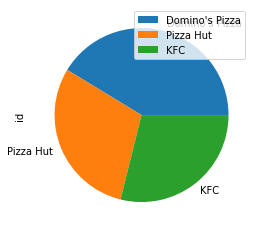

In [9]:
resturant_chain.sort_values('city',ascending=False).head(3).plot.pie(x='name',y='id')